<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw2_homeDotTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
#uploaded = drive.CreateFile({'title': 'Sample upload.txt'})
#uploaded.SetContentString('Sample upload file content')
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
#downloaded = drive.CreateFile({'id': uploaded.get('id')})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))



# check freq table
# https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html

In [0]:
## name : HW2_4.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import mode
# using Naive Bayes


<details>
    <summary>**FILE_ID!!!** </summary>
    <pre>
title: userLog_201801_201802_for_participants.csv, id: 19sNUEOYeqU33EWBMRKq65YydpgLQoppZ
title: developer_main.csv, id: 1jjOrl2Dcw7AhsKPr2W4qU4LptkAkVbsV
title: project_description.csv, id: 1y5tTE8nE_0GGclmSzsGZY4mfb1kArD1f
title: project_main.csv, id: 1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0
title: unit_type_id.csv, id: 1G-n9Bno_zyFL17ggRoaZIQZ7O9ph0CmR
title: district_province_id.csv, id: 1ymd-812YyEyGs5exJnrKdWFnP15D0yFp
title: facility_id.csv, id: 1eHh1ewhDPfwVhUQV5mplOkTmshg_ohNG
title: developer_brand.csv, id: 1z0diuRz1VVnephPtrHo0kMs6dDqLqdxj
title: project_unit.csv, id: 1L0VA6sAY7SiYlIoA8W6fObHZ0uHOi9-J
title: project_facility.csv, id: 13jUinwDsk9sYvoMOBaTMfTM11912CvdO
    </pre>
</details>
    <pre>
title: userLog_201801_201802_for_participants.csv, id: 19sNUEOYeqU33EWBMRKq65YydpgLQoppZ
title: developer_main.csv, id: 1jjOrl2Dcw7AhsKPr2W4qU4LptkAkVbsV
title: project_description.csv, id: 1y5tTE8nE_0GGclmSzsGZY4mfb1kArD1f
title: project_main.csv, id: 1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0
title: unit_type_id.csv, id: 1G-n9Bno_zyFL17ggRoaZIQZ7O9ph0CmR
title: district_province_id.csv, id: 1ymd-812YyEyGs5exJnrKdWFnP15D0yFp
title: facility_id.csv, id: 1eHh1ewhDPfwVhUQV5mplOkTmshg_ohNG
title: developer_brand.csv, id: 1z0diuRz1VVnephPtrHo0kMs6dDqLqdxj
title: project_unit.csv, id: 1L0VA6sAY7SiYlIoA8W6fObHZ0uHOi9-J
title: project_facility.csv, id: 13jUinwDsk9sYvoMOBaTMfTM11912CvdO
    </pre>

In [0]:
def readDataFromDrive_HDT_single_col(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv')
  name_dev_br = raw_data.columns.values[0].split(";")
  raw_data = raw_data[raw_data.columns.values[0]].str.split(";",expand = True) 
  raw_data.columns = name_dev_br
  raw_data = raw_data.convert_objects(convert_numeric=True)
  print(raw_data.dtypes)
  for name_col in name_dev_br :
    print(name_col , 'null :',raw_data[name_col].isnull().values.any())
  print('#########################################################################################################################')
  return raw_data;
  
def readDataFromDrive_HDT(file_id):
  # file_id is str
  data_downloaded = drive.CreateFile({'id': file_id })
  data_downloaded.GetContentFile('readCsvFile.csv')
  raw_data = pd.read_csv('readCsvFile.csv')
  print(raw_data.dtypes)
  print('-------------- NA DATA ------------------')
  for name_col in raw_data.columns:
    print(name_col,'null :',raw_data[name_col].isnull().values.any())
  print('#########################################################################################################################')
  return raw_data;

In [30]:
# care values province_id
# we use only chiang mai  province_id = 43 
### load data ###############################################################################
print('userLog')
userLog = readDataFromDrive_HDT_single_col('19sNUEOYeqU33EWBMRKq65YydpgLQoppZ') 
userLog.head()
# project_description = readDataFromDrive_HDT_single_col('1y5tTE8nE_0GGclmSzsGZY4mfb1kArD1f') 

userLog


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


userCode           object
project_id          int64
requestedDevice    object
userAgent          object
pageReferrer       object
year                int64
month               int64
day                 int64
hour                int64
dtype: object
userCode null : False
project_id null : False
requestedDevice null : False
userAgent null : False
pageReferrer null : False
year null : False
month null : False
day null : False
hour null : False
#########################################################################################################################


,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018,1,1,0
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018,1,1,0
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018,1,1,0


In [31]:
userLog.describe()

,project_id,year,month,day,hour
count,1.234579e+06,1234579.0,1.234579e+06,1.234579e+06,1.234579e+06
mean,6.401208e+03,2018.0,1.427945e+00,1.476546e+01,1.424961e+01
std,2.197497e+03,0.0,4.947810e-01,8.233066e+00,5.774527e+00
min,4.000000e+00,2018.0,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.928000e+03,2018.0,1.000000e+00,8.000000e+00,1.100000e+01
50%,6.446000e+03,2018.0,1.000000e+00,1.500000e+01,1.500000e+01
75%,8.428000e+03,2018.0,2.000000e+00,2.100000e+01,1.900000e+01
max,9.504000e+03,2018.0,2.000000e+00,3.100000e+01,2.300000e+01


(482751, 3)
189467


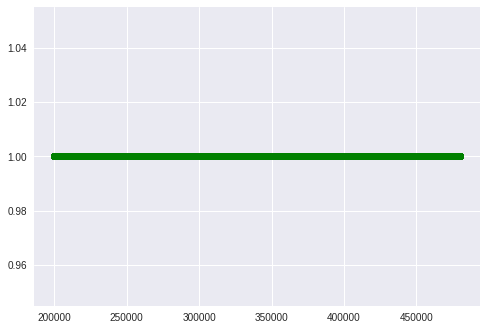

In [32]:
userLog['userCode']
new = pd.crosstab(userLog['userCode'],userLog['requestedDevice'] )

new['SUM'] = new['Desktop'] + new['Mobile'] 
new_np = np.array(new[["Desktop","Mobile","SUM"]].values)
# print(new_np[:,2])
# New Section
print(new_np.shape)
print(np.count_nonzero(new_np[:,2] > 1))
fa = 200000

a = np.arange(200000,480000 +1)
# plt.plot(a,np.sort(new_np[:,2])[-a.shape[0]:],'go') # last order
plt.plot(a,np.sort(new_np[:,2])[0:a.shape[0]],'go') # fi order
plt.show()
# n, bins, patches = plt.hist(new_np[:,2], 100, density=True, facecolor='g', alpha=0.75)
# plt.show()


#pd.crosstab(userLog['userCode'], userLog[['userAgent','pageReferrer']], rownames=['userCode'], colnames=['userAgent', 'pageReferrer'])

(482751, 3)
189467


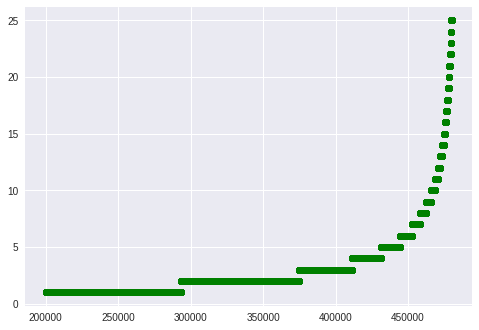

In [0]:
userLog['userCode']
new = pd.crosstab(userLog['userCode'],userLog['requestedDevice'] )

new['SUM'] = new['Desktop'] + new['Mobile'] 
new_np = np.array(new[["Desktop","Mobile","SUM"]].values)
# print(new_np[:,2])
# New Section
print(new_np.shape)
print(np.count_nonzero(new_np[:,2] > 1))
fa = 200000
la = 480000 +1
a = np.arange(200000,480000 +1)
# plt.plot(a,np.sort(new_np[:,2])[-a.shape[0]:],'go') # last order
# plt.plot(a,np.sort(new_np[:,2])[0:a.shape[0]],'go') # first order
plt.plot(a,np.sort(new_np[:,2])[fa:la],'go') # mid order
plt.show()

# n, bins, patches = plt.hist(new_np[:,2], 100, density=True, facecolor='g', alpha=0.75)
# plt.show()


#pd.crosstab(userLog['userCode'], userLog[['userAgent','pageReferrer']], rownames=['userCode'], colnames=['userAgent', 'pageReferrer'])

In [33]:
print('developer_main')
developer_main = readDataFromDrive_HDT('1jjOrl2Dcw7AhsKPr2W4qU4LptkAkVbsV')   ### readDataFromDrive_HDT(file_id) 
developer_main = developer_main.dropna(subset=['province_id'])
developer_main['province_id'] = developer_main['province_id'].astype('int')
developer_main = developer_main.loc[developer_main['province_id'] == 10]
developer_main.head()
#print(developer_main['province_id'].isnull().sum())
print(developer_main.shape)

developer_main
developer_id           int64
developer_name_th     object
developer_name_en     object
description_th        object
district_id          float64
province_id          float64
developer_status      object
dtype: object
-------------- NA DATA ------------------
developer_id null : False
developer_name_th null : False
developer_name_en null : True
description_th null : True
district_id null : True
province_id null : True
developer_status null : False
#########################################################################################################################
(709, 7)


In [34]:
print('project_main')
project_main = readDataFromDrive_HDT_single_col('1iRz0edC_tjIk0Ge33fKLZYN1ciXxup-0')  
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.convert_objects(convert_numeric=True)
project_main.head()

project_main
project_id                  int64
developer_id                int64
brand_id                  float64
project_name_th            object
project_name_en            object
district_id               float64
province_id                 int64
lat                       float64
lon                       float64
project_land_size_rai       int64
project_land_size_ngan      int64
project_land_size_wa        int64
total_unit                float64
percent_car_parking       float64
starting_price            float64
highest_price             float64
project_status             object
created_at                 object
dtype: object
project_id null : False
developer_id null : False
brand_id null : True
project_name_th null : False
project_name_en null : False
district_id null : True
province_id null : False
lat null : True
lon null : False
project_land_size_rai null : False
project_land_size_ngan null : False
project_land_size_wa null : False
total_unit null : True
percent_car_parking nu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1.0,2011-01-14T18:40:12.117+0700
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0.0,2011-02-24T21:43:59.297+0700
7,208,13323,NaN,ลิฟวิ่งนารา รามคำแหง-สุวรรณภูมิ,LIVING NARA RAMKHAMHAENG-SUVARNABHUMI,1011.0,10,13.769810,100.722040,44,201.0,NaN,3500000.0,7600000.0,0.0,2010-07-02T07:00:00.000+0700
8,228,6772,0.0,เค.ซี.รามอินทรา 5 (พระยาสุเรนทร์),K.C. RAMINTRA 5,1046.0,10,13.862623,100.695135,34,NaN,NaN,1810000.0,NaN,0.0,2010-12-16T18:51:42.173+0700
11,982,12136,979.0,อนาวิลล์ สุวรรณภูมิ,Anaville Suvarnabhumi,1011.0,10,13.763348,100.803434,131,NaN,NaN,4300000.0,NaN,1.0,2011-01-17T22:55:47.317+0700


In [0]:
#project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa', 'project_name_th', 'project_name_en'])
project_main = project_main.dropna(subset=['lat'])
#project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].median().iloc[0])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])
# df.fillna(df.mode().iloc[0])

In [0]:
def normalize_quassion(x):
  x_mean = np.mean(x,axis = 0)
  x_std = np.std(x,axis = 0)
  x_nor = (x - x_mean)/x_std
  return x_nor,x_mean,x_std;

In [41]:
# project_facility  
project_facility = readDataFromDrive_HDT_single_col('13jUinwDsk9sYvoMOBaTMfTM11912CvdO')

project_id     int64
facility_id    int64
dtype: object
project_id null : False
facility_id null : False
#########################################################################################################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [42]:
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table_index)
project_facility_table.head()

[   4   24   29 ... 9534 9536 9541]


facility_id,1,2,3,4,5,6
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


In [65]:
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()

(1696, 6)
(1696, 16)


facility_id,1,2,3,4,5,6
project_id,,,,,,
24,0,0,1,1,0,1
44,1,0,1,0,0,0
45,0,1,1,1,1,0
95,1,0,0,0,0,0
133,1,0,1,0,1,0


In [0]:
project_main.head()

In [68]:
userLog.head()

,userCode,project_id,requestedDevice,userAgent,pageReferrer,year,month,day,hour
0,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
1,7717bdc2-ea3e-e8ad-5d6b-178bd71c38b2,7956,Mobile,Android,HomeWebsite,2018,1,1,0
2,cb5b4b68-cc01-6db6-f54b-4a0f881301c5,5067,Mobile,iPhone,HomeWebsite,2018,1,1,0
3,5f74cef2-0d1e-b619-3564-0955a14e0985,6654,Mobile,iPhone,Google,2018,1,1,0
4,dba8f279-844e-eef6-73ac-22bd7d1353cc,6474,Mobile,iPad,Google,2018,1,1,0


In [83]:
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
userLog_freq_proj = userLog['project_id'].value_counts()
userLog_freq_proj_np = np.array(userLog_freq_proj.values)
print(userLog_freq_user_np.shape)
userLog_freq_user.head()




(482751,)


de89bac5-57c6-ecfb-184d-cc4e973c31ac    24308
31bb9bf0-8ad5-3e50-f334-e6c7de89bac5     8238
3f0b3f64-468d-8411-efee-debb3facd532     1641
eec0a125-d5ab-f692-c501-4713c35c756d     1533
b883abba-dc3e-f30d-a571-98fffeffe88f     1362
Name: userCode, dtype: int64

In [81]:
print(userLog_freq_proj.shape)
userLog_freq_proj.head()

'''
hist, bin_edge = np.histogram(userLog_freq_proj_np, 1000)
# make sure to import matplotlib.pyplot as plt
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
plt.show()
'''



(5395,)


"\nhist, bin_edge = np.histogram(userLog_freq_proj_np, 1000)\n# make sure to import matplotlib.pyplot as plt\n# plot the histogram\nplt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')\nplt.show()\n"

In [89]:
print(mode(userLog_freq_user_np))
print(np.percentile(userLog_freq_user_np, 90))
print('++++++++++++++++++++++++++++++++++++++++++')
print(mode(userLog_freq_proj_np))
print(np.percentile(userLog_freq_proj_np, 10))

ModeResult(mode=array([1]), count=array([293284]))
5.0
++++++++++++++++++++++++++++++++++++++++++
ModeResult(mode=array([1]), count=array([188]))
11.0


In [88]:
# print(userLog_freq_user.loc[userLog_freq_user < 6])
normal_user = userLog_freq_user.loc[userLog_freq_user < 6].index
print(normal_user.shape)
# print(normal_user)
### clean data user log
# project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
userLog

(444303,)


In [62]:
project_main_np_data  = np.hstack((np.array(project_main[["lat","lon","starting_price"]].values) , np.array(project_facility_table.values)))    
project_main_np_data_nor,project_main_np_data_mean,project_main_np_data_std  = normalize_quassion(project_main_np_data)
#### back to data ##################################
# project_main_np_data == project_main_np_data_std * project_main_np_data_nor + project_main_np_data_mean
####################################################
print(project_main_np_data_nor)

#project_main_np_data  = np.array(project_main[["lat","lon"]].values
print(np.count_nonzero(np.isnan(project_main_np_data)))
# project_main_proj_id = np.array(project_main["project_id"].values)

#print(a)
#print(b)



[[ 1.58360877  1.55301961 -0.18253589 ...  0.67050179 -3.54513751
   2.35547502]
 [ 1.79447196  1.44940892 -0.30500285 ... -1.49142033 -3.54513751
  -0.42454282]
 [ 0.56438745  1.50534908 -0.08029283 ...  0.67050179  0.28207651
  -0.42454282]
 ...
 [ 0.5052497   0.82737894  0.08823969 ...  0.67050179  0.28207651
  -0.42454282]
 [ 0.76724323  0.56165238  0.98707979 ... -1.49142033  0.28207651
  -0.42454282]
 [-0.16228534  1.03831554  0.1668882  ...  0.67050179  0.28207651
   2.35547502]]
0


# K-mean

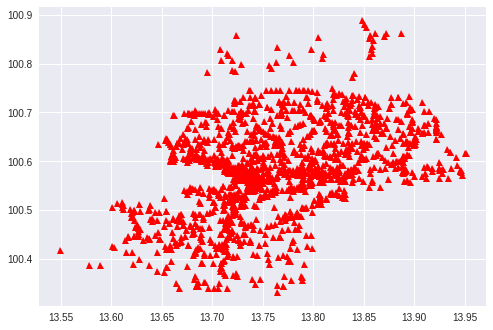

[2 2 0 ... 0 4 0]


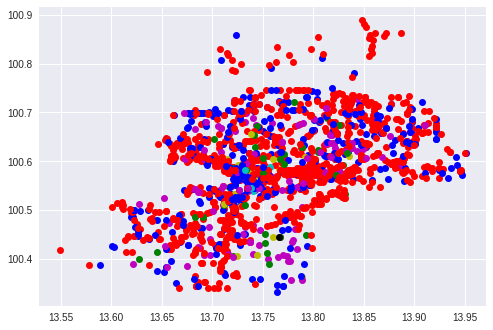

"\nkmean_result =  KMeans(n_clusters=7).fit(project_main_np_data[0:2,:])\nkmean_result.fit(project_main_np_data)\nprint(kmean_result.labels_)\n### k-mean \ncolors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko']\nfor i in np.arange(project_main_np_data.shape[0]):\n  plt.plot(project_main_np_data[i,0], project_main_np_data[i,1], colors[kmean_result.labels_[i]])\nplt.show()\n"

In [67]:
plt.plot(project_main_np_data[:,0], project_main_np_data[:,1], 'r^')
plt.show()
##
from sklearn.cluster import KMeans
kmean_result =  KMeans(n_clusters=7).fit(project_main_np_data_nor)
kmean_result.fit(project_main_np_data)
print(kmean_result.labels_)
### k-mean 
colors = ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko']
for i in np.arange(project_main_np_data.shape[0]):
  plt.plot(project_main_np_data[i,0], project_main_np_data[i,1], colors[kmean_result.labels_[i]])
plt.show()

##


In [0]:
# 

In [0]:
# see some data
project_facility = readDataFromDrive_HDT_single_col('13jUinwDsk9sYvoMOBaTMfTM11912CvdO') 
# we use only chiang mai  province_id = 43 
### clean_data ###############################################################################
###  we selected data only 'Bangkok'
# province_id == 10

In [0]:
# print(raw_proj_des.dtypes)
# raw_proj_des.head()

In [0]:
print(raw_dev_br.dtypes)
raw_dev_br['developer_id'] = raw_dev_br['developer_id'].astype('int')
raw_dev_br['brand_id'] = raw_dev_br['brand_id'].astype('int')
raw_dev_br['brand_name_th'] = raw_dev_br['brand_name_th'].astype('str')
raw_dev_br['brand_name_en'] = raw_dev_br['brand_name_en'].astype('str')
print(raw_dev_br.dtypes)
raw_dev_br.head()

In [0]:
print(raw_dev_main.dtypes)
print(raw_dev_main['province_id'].isnull().sum())
raw_dev_main = raw_dev_main.dropna(subset=['province_id'])
raw_dev_main['province_id'] = raw_dev_main['province_id'].astype('int')
# raw_dev_main['district_id'] = raw_dev_main['district_id'].astype('int')
print(raw_dev_main['district_id'].isnull().sum())
raw_dev_main = raw_dev_main.loc[raw_dev_main['province_id'] == 10] 
# work
# 
# used_dev_main['province_id'] = used_dev_main['province_id'].apply(np.int64)
# raw_dev_main.drop(raw_dev_main.loc[raw_dev_main['province_id'].isnull()])
# print(raw_dev_main['province_id'].isnull().sum())
# raw_dev_main.head()
raw_dev_main.head()

In [0]:
raw_dev_main.describe()

In [0]:
print(raw_dis_pro_id.dtypes)
raw_dis_pro_id = raw_dis_pro_id.loc[raw_dis_pro_id['province_name_en'] == 'Bangkok']
raw_dis_pro_id['district_id'] = raw_dis_pro_id['district_id'].astype('int')
raw_dis_pro_id['province_id'] = raw_dis_pro_id['province_id'].astype('int')
raw_dis_pro_id.head()

In [0]:
print(raw_fac_id.dtypes)
raw_fac_id.head()

In [0]:
raw_fac_id.describe()

In [0]:
#### don't know ###
# project_description = "project_description.csv"
# raw_proj_des = pd.read_csv(project_description)
# name_proj_des = raw_proj_des.columns.values[0] #.split(";")
# raw_fac_id = raw_fac_id[raw_fac_id.columns.values[0]].str.split(";",expand = True) 
# print('raw_proj_des')
# print(name_dev_br)
# print('#######################################')
# raw_proj_des.head()
# raw_proj_des.describe()
###################

In [0]:
print(raw_proj_fac.dtypes)
raw_proj_fac.head()

In [0]:
raw_proj_fac.describe()

In [0]:
print(raw_proj_main.dtypes)
print(raw_proj_main['province_id'].isnull().sum())
raw_proj_main['province_id'] = raw_proj_main['province_id'].astype('int')
# proj_id
raw_proj_main['project_id'] = raw_proj_main['project_id'].astype('int')
# dev_id
raw_proj_main['developer_id'] = raw_proj_main['developer_id'].astype('int')
# district_id
raw_proj_main = raw_proj_main.loc[raw_proj_main['province_id'] == 10]
raw_proj_main.head()

In [0]:
raw_proj_main.describe()

In [0]:
raw_proj_unit.describe()

In [0]:
print(raw_unit_type_id.dtypes)
raw_unit_type_id.head()

In [0]:
print(raw_userLog.dtypes)
raw_userLog.head()

In [0]:
raw_userLog.describe()

In [0]:
#############################################################################################
#############################################################################################
#### don't know ###
# data_downloaded = drive.CreateFile({'id': '1y5tTE8nE_0GGclmSzsGZY4mfb1kArD1f' })
# data_downloaded.GetContentFile('readCsvFile.csv', engine='python')
# raw_data = pd.read_csv('readCsvFile.csv')
# name_col = raw_data.columns[0].split(";")
# print(name_col)

# raw_data = raw_data[raw_data.columns[0].values].atype('str')
# print(raw_data.head(10))
# print('999999999999999999999999999999999999999999999999999')
## checking
#for i in np.arange(2):
#  sample_k = raw_data.loc[i]
#  sample_k_test = sample_k.str.split(";",expand = True) 
#  print('-----------------------------')
#  print('shape is', sample_k.shape)
#  print(sample_k_test)
  
# project_descrip = "project_description.csv"
# raw_proj_des = pd.read_csv(project_descrip, error_bad_lines=False)
# name_proj_des = raw_proj_des.columns.values.split(";")
# raw_fac_id = raw_fac_id[raw_fac_id.columns.values].str.split(";",expand = True) 
# raw_fac_id.columns = name_proj_des
# print('raw_proj_des')
# print(name_proj_des)
# print('#######################################')
###################